In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMG_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.utils.image_dataset_from_directory(
    "PlantVillage",
    image_size = (IMG_SIZE,IMG_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = True   
)

Found 2152 files belonging to 3 classes.


In [4]:
# get the 3 classes
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 2 0 1 0 0 1 2 1 1 1 0 1 1 1 0 0 1 0 1 1 2 0 2 2 1 0 1 0 0 0]


In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[174. 172. 183.]
  [169. 167. 178.]
  [171. 169. 180.]
  ...
  [135. 133. 144.]
  [137. 135. 146.]
  [140. 138. 149.]]

 [[199. 197. 208.]
  [192. 190. 201.]
  [187. 185. 196.]
  ...
  [155. 153. 164.]
  [157. 155. 166.]
  [152. 150. 161.]]

 [[176. 174. 185.]
  [175. 173. 184.]
  [176. 174. 185.]
  ...
  [158. 156. 167.]
  [163. 161. 172.]
  [152. 150. 161.]]

 ...

 [[195. 194. 202.]
  [193. 192. 200.]
  [191. 190. 198.]
  ...
  [156. 153. 160.]
  [160. 157. 164.]
  [148. 145. 152.]]

 [[192. 191. 199.]
  [192. 191. 199.]
  [193. 192. 200.]
  ...
  [173. 170. 177.]
  [179. 176. 183.]
  [164. 161. 168.]]

 [[190. 189. 197.]
  [192. 191. 199.]
  [195. 194. 202.]
  ...
  [175. 172. 179.]
  [171. 168. 175.]
  [151. 148. 155.]]]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


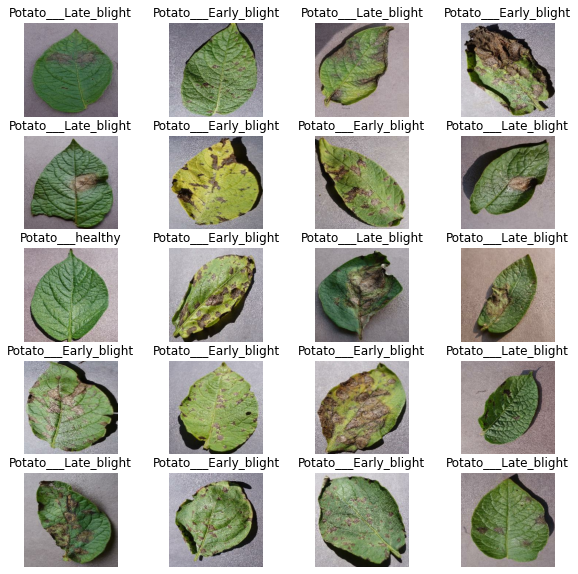

In [9]:
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset.take(1):    
    for i in range(20):
        ax = plt.subplot(5, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [10]:
len(dataset)

68

In [11]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [12]:
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
remain_ds = dataset.skip(54) 
len(remain_ds)

14

In [14]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [15]:
val_ds = dataset.take(6)
len(val_ds)

6

In [16]:
test_ds = remain_ds.skip(6) 
len(test_ds)

8

In [17]:
# python equivalent

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_ds = int(test_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [23]:
# scale the image and data augmentation

resize_and_rescaling = tf.keras.Sequential([
        layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
        layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [24]:
data_augmentation = tf.keras.Sequential([
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.2)
])

In [25]:
# Convolution nerual networks

input_shape = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS)
n_classes = 3
model1 = models.Sequential([
        resize_and_rescaling,
        data_augmentation,
        layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax')
])

model1.build(input_shape = input_shape)

In [26]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [27]:
model1.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [28]:
history = model1.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 83s 1s/step - loss: 0.9123 - accuracy: 0.4994 - val_loss: 0.8303 - val_accuracy: 0.5208
Epoch 2/50
54/54 [==============================] - 84s 2s/step - loss: 0.8572 - accuracy: 0.5631 - val_loss: 0.8469 - val_accuracy: 0.5000
Epoch 3/50
54/54 [==============================] - 82s 2s/step - loss: 0.7938 - accuracy: 0.6325 - val_loss: 0.5464 - val_accuracy: 0.7708
Epoch 4/50
54/54 [==============================] - 82s 2s/step - loss: 0.4750 - accuracy: 0.8021 - val_loss: 0.3064 - val_accuracy: 0.8490
Epoch 5/50
54/54 [==============================] - 84s 2s/step - loss: 0.3650 - accuracy: 0.8542 - val_loss: 0.2634 - val_accuracy: 0.8854
Epoch 6/50
54/54 [==============================] - 83s 2s/step - loss: 0.3381 - accuracy: 0.8628 - val_loss: 0.1985 - val_accuracy: 0.9115
Epoch 7/50
54/54 [==============================] - 80s 1s/step - loss: 0.2119 - accuracy: 0.9161 - val_loss: 0.2621 - val_accuracy: 0.8958
Epoch 8/50
54/54 [==

In [29]:
scores = model1.evaluate(test_ds)

8/8 [==============================] - 6s 333ms/step - loss: 0.0134 - accuracy: 0.9961


In [30]:
scores

[0.013374336063861847, 0.99609375]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [33]:
history.history['accuracy']

[0.49942129850387573,
 0.5630787014961243,
 0.6325231194496155,
 0.8020833134651184,
 0.8541666865348816,
 0.8628472089767456,
 0.9160879850387573,
 0.9137731194496155,
 0.9328703880310059,
 0.9386574029922485,
 0.9479166865348816,
 0.9537037014961243,
 0.9317129850387573,
 0.9537037014961243,
 0.9623842835426331,
 0.9612268805503845,
 0.9641203880310059,
 0.9265046119689941,
 0.9820601940155029,
 0.9803240895271301,
 0.9733796119689941,
 0.9832175970077515,
 0.9583333134651184,
 0.9861111044883728,
 0.9797453880310059,
 0.9855324029922485,
 0.9837962985038757,
 0.9774305820465088,
 0.9884259104728699,
 0.9878472089767456,
 0.9820601940155029,
 0.9849537014961243,
 0.9837962985038757,
 0.9895833134651184,
 0.9820601940155029,
 0.9849537014961243,
 0.9878472089767456,
 0.9733796119689941,
 0.9913194179534912,
 0.984375,
 0.9890046119689941,
 0.9907407164573669,
 0.9901620149612427,
 0.9947916865348816,
 0.9814814925193787,
 0.984375,
 0.9855324029922485,
 0.9907407164573669,
 0.99421298

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
loss = history.history['loss']

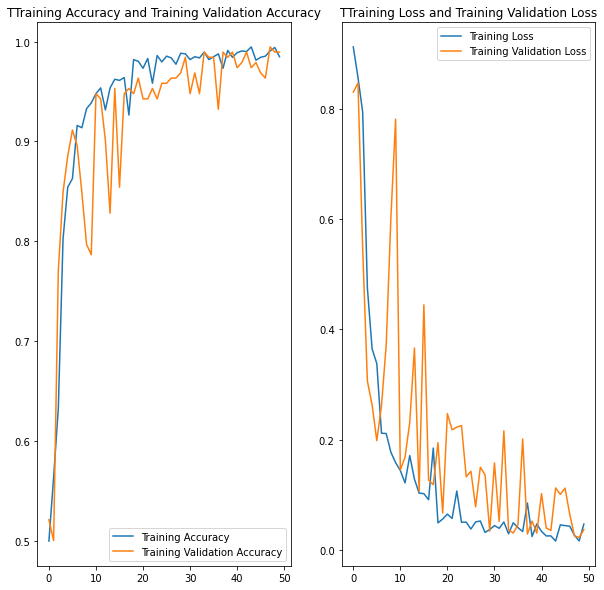

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Training Validation Accuracy')
plt.legend(loc='lower right')
plt.title('TTraining Accuracy and Training Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Training Validation Loss')
plt.legend(loc='upper right')
plt.title('TTraining Loss and Training Validation Loss')
plt.show()

Print first image to predict: 
actual label:  Potato___Late_blight
prediction label:  Potato___Late_blight


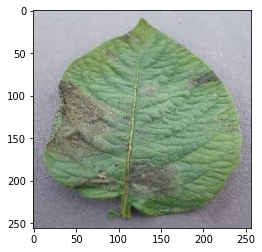

In [37]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print('Print first image to predict: ')
    plt.imshow(first_image)
    print('actual label: ', class_names[first_label])
    
    batch_prediction = model1.predict(image_batch)
    print('prediction label: ', class_names[np.argmax(batch_prediction[0])])


In [47]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # batch creation
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(batch_prediction[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

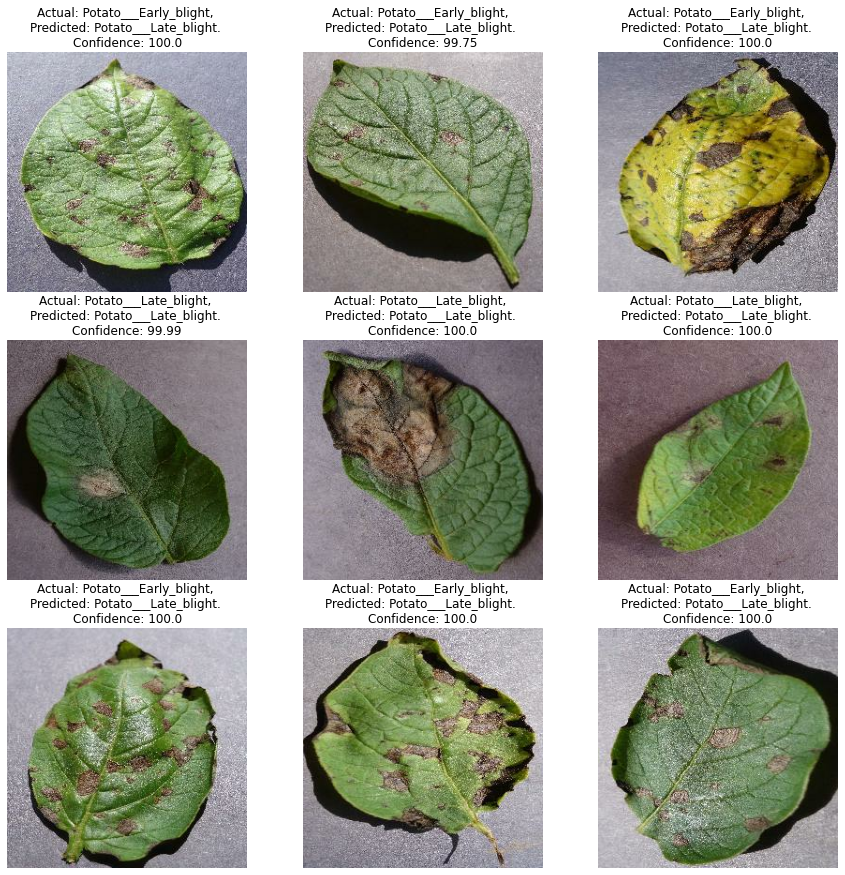

In [48]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model1, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \nPredicted: {predicted_class}. \nConfidence: {confidence}")
        
        
        plt.axis("off")

In [52]:
import os
model_version = max([int(i) for i in os.listdir("../models") + [0]])+1
model1.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets
